In [1]:
clean_up=True # removes gams-related files in work-folder if true
%run StdPackages.ipynb
os.chdir(directory['curr'])


The file_gams_py_gdb0.gdx is still active and was not deleted.
The file_gams_py_gdb1.gdx is still active and was not deleted.
The file_gams_py_gdb2.gdx is still active and was not deleted.
The file_gams_py_gdb3.gdx is still active and was not deleted.
The file_gams_py_gdb5.gdx is still active and was not deleted.
The file_gams_py_gdb7.gdx is still active and was not deleted.


In [2]:
if True:
    catalog = "categoryexperiment2"
    currapp = False
    elec = False
    smoothed = False
    from matplotlib.ticker import NullFormatter
    from cycler import cycler
    import warnings
    warnings.filterwarnings("error", category=UserWarning)
    import seaborn as sns
    sns.set_theme()

In [3]:
explore = False

## A rising price of emissions
We present graphically what happens when the emission price gradually increases (static model solution for each price).

In [4]:
x_var = "pM"
if currapp:
    currapp_string = "_currapp"
else:
    currapp_string = ""
if elec:
    elec_string = "_elec"
else:
    elec_string = ""
if smoothed:
    smoothed_string = "_smoothed"
else:
    smoothed_string = ""

assert elec + smoothed != 2
    
if catalog == "main_catalog":
    if elec:
        df = {}
        with (open(x_var + "_" + catalog + elec_string + ".pkl", "rb")) as f:
            df[catalog + elec_string] = pickle.load(f)
        with (open(x_var + "_" + catalog + ".pkl", "rb")) as f:
            df[catalog] = pickle.load(f)
    elif smoothed:
        df = {}
        with (open(x_var + "_" + catalog + smoothed_string + ".pkl", "rb")) as f:
            df[catalog + smoothed_string] = pickle.load(f)
        with (open(x_var + "_" + catalog + ".pkl", "rb")) as f:
            df[catalog] = pickle.load(f)
    else:
        with (open(x_var + "_" + catalog + ".pkl", "rb")) as f:
            df = pickle.load(f)

elif catalog == "categoryexperiment":
    df = {}
    with open(x_var + "_" + "categoryexperiment_ID" + ".pkl", "rb") as f:
        df["ID"] = pickle.load(f)
    with open(x_var + "_" + "categoryexperiment_EOP" + ".pkl", "rb") as f:
        df["EOP"] = pickle.load(f)
elif catalog == "categoryexperiment2":
    df = {}
    with open(x_var + "_" + "categoryexperiment2_ID" + ".pkl", "rb") as f:
        df["ID"] = pickle.load(f)
    with open(x_var + "_" + "categoryexperiment2_EOP" + ".pkl", "rb") as f:
        df["EOP"] = pickle.load(f)

In [5]:
#Calculate abated emissions
if catalog == "categoryexperiment_EOP":
        df["M0-M"] = df["M0"].iloc[0] - df["M"]
elif catalog == "main_catalog":
    if elec:
        df[catalog + elec_string]["M0-M"] = df[catalog + elec_string]["M0"].iloc[0] - df[catalog + elec_string]["M"]
        df[catalog]["M0-M"] = df[catalog]["M0"].iloc[0] - df[catalog]["M"]
    elif smoothed:
        df[catalog + smoothed_string]["M0-M"] = df[catalog + smoothed_string]["M0"].iloc[0] - df[catalog + smoothed_string]["M"]
        df[catalog]["M0-M"] = df[catalog]["M0"].iloc[0] - df[catalog]["M"]
    else:
        df["M0-M"] = df["M0"].iloc[0] - df["M"]
elif catalog in ["categoryexperiment_ID"]:
    df["M0-M"] = df["M0"].iloc[0] - df["M0"]
elif catalog in ["categoryexperiment"]:
    df["EOP"]["M0-M"] = df["EOP"]["M0"].iloc[0] - df["EOP"]["M"]
    df["ID"]["M0-M"] = df["ID"]["M0"].iloc[0] - df["ID"]["M0"]
elif catalog in ["categoryexperiment2"]:
    df["EOP"]["M0-M"] = df["EOP"]["M0"].iloc[0] - df["EOP"]["M"]
    df["ID"]["M0-M"] = df["ID"]["M0"].iloc[0] - df["ID"]["M"]

In [6]:
def translate(col):    
    translate = {
        "M0":"Emissions",
        "pM":"Price of emissions",
        "PwThat_basetech_EH_oil":"Effective oil price",
        "PwThat_basetech_EH_electricity":"Effective electricity price",
        "PwThat_basetech_EH_oil_linear":"Oil price without end-of-pipe",
        "qD_basetech_EH_oil":"Oil use",
        "qD_basetech_EH_electricity":"Electricity use",
        "qD_U0_ID_C_EH_2":"Baseline technology",
        "qD_U_ID_t2_1":"Clean technology",
        "qD_U_ID_t1_2":"Semi-clean technology",
        "qD_EH":"Energy service",
        "qD_Y":"Y composite",
        "M0_CO2":"CO2 Emissions",
        "M0-M":"Abated emissions",
        "PwThat_U_ID_t1_2":"Semi-clean technology", 
        "PwThat_U0_ID_C_EH_2":"Baseline technology", 
        "PwThat_U_ID_t2_1":"Clean technology", 
        "PwThat_C_EH_2":"Component with overlap",
        "qD_C_EH_2":"Component with overlap",
        "qD_oil":"Total oil use",
        "qD_U_ID_t1_1":"Input-displacing technology",
        "PwThat_U_EOP_t1_1":"Unit cost of low-cost EOP technology",
        "PwThat_U_EOP_t2_1":"Unit cost of high-cost EOP technology"
    }
    if col in translate:
        return translate[col]
    else:
        return col

def format_double_axes(ax, ax2, x_label="", y_label="", hide_ticks=True):
    ax.set_xlabel(x_label, fontsize=9)
    ax.set_ylabel(y_label, fontsize=9, rotation=90)
#     ax.yaxis.set_label_coords(0.1,1.02)
    if hide_ticks:
        ax.get_xaxis().set_ticks([])
#         ax2.get_yaxis().set_ticks([])
#         ax.get_yaxis().set_ticks([])
    ax.spines["left"].set_visible(True)
    ax.spines["bottom"].set_visible(True)
    ax.spines["left"].set_linewidth(1)
    ax.spines["left"].set_edgecolor("k")
    ax.spines["bottom"].set_edgecolor("k")
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax2.grid(False)
    #ax.set_axisbelow(True)
    if hide_ticks:
        ax.tick_params(labelleft=False)
        ax2.tick_params(labelright=False)
        ax.tick_params(axis='y', colors='white')
        ax2.tick_params(axis='y', colors='white')
    ax.grid(axis='y', color="lightgrey", linewidth=1)
        
#         ax.get_yaxis().set_major_formatter(NullFormatter())

def format_single_axis(axes, x_label="", y_label="", hide_ticks=True):
    axes.set_xlabel(x_label, fontsize=9)
    axes.set_ylabel(y_label, fontsize=9, rotation=90)
#     axes.yaxis.set_label_coords(0.1,1.02)
    if hide_ticks:
        axes.get_xaxis().set_ticks([])
#         axes.get_yaxis().set_ticks([])
    axes.spines["left"].set_visible(True)
    axes.spines["bottom"].set_visible(True)
    axes.spines["left"].set_linewidth(1)
    axes.spines["left"].set_edgecolor("k")
    axes.spines["bottom"].set_edgecolor("k")
    axes.spines["bottom"].set_linewidth(1)
    axes.spines["right"].set_visible(False)
    axes.spines["top"].set_visible(False)
    if hide_ticks:
        axes.tick_params(labelleft=False)
#         axes.get_xaxis().set_major_formatter(NullFormatter())
    #axes.set_axisbelow(True)
    axes.grid(axis='y', color="lightgrey", linewidth=1)
    

In [7]:
if catalog == "main_catalog":
    if not elec:
        if currapp:
            vlines = (df[["PwThat_U_EOP_t1_1", "PwThat_U_EOP_t2_1"]].mean() - pd.Series([df["muG_C_CO2_1"].mean(), df["muG_C_CO2_2"].mean()], index=df[["PwThat_U_EOP_t1_1", "PwThat_U_EOP_t2_1"]].columns)).to_list()
        elif smoothed:
            vlines = df[catalog][["PwThat_U_EOP_t1_1", "PwThat_U_EOP_t2_1"]].mean().to_list()
        else:
            try:
                vlines = df[["PwThat_U_EOP_t1_1", "PwThat_U_EOP_t2_1"]].mean().to_list()
            except:
                vlines = df[["PwThat_U_ID_t1_2", "PwThat_U_ID_t2_1"]].mean().to_list()
    elif smoothed:
        vlines = df[main_catalog][["PwThat_U_EOP_t1_1", "PwThat_U_EOP_t2_1"]].mean().to_list()
elif catalog == "categoryexperiment_EOP":
    vlines = df[["PwThat_U_EOP_t1_1"]].mean().to_list()
elif catalog == "categoryexperiment_ID":
    vlines = df[["PwThat_U_ID_t1_1"]].mean().to_list()
elif catalog == "categoryexperiment":
    vlines = df["EOP"][["PwThat_U_EOP_t1_1"]].mean().to_list()
elif catalog == "categoryexperiment2":
    vlines = df["EOP"][["PwThat_U_EOP_t1_1", "PwThat_U_EOP_t2_1"]].mean().to_list()

In [8]:
if elec:
    fig = plt.figure(figsize=(2.95, 2.2))
    fig.add_subplot(1,1,1)
    ax = fig.get_axes()[0]
    #ax.plot(df[catalog + elec_string].index, df[catalog + elec_string].index, label="Price of emissions (45 degree line)", linewidth=3)
    col = "PwThat_U_EOP_t1_1"
    #ax.hlines(y=df[catalog + elec_string][col].values[0], xmin=df[catalog + elec_string].index.min(), xmax=df[catalog + elec_string].index.max(), ls="--", color="grey", lw=2)
    ax.plot(df[catalog + elec_string].index, df[catalog + elec_string][col], label=translate(col), linewidth=3)
    col = "PwThat_U_EOP_t2_1"
    #ax.hlines(y=df[catalog + elec_string][col].values[0], xmin=df[catalog + elec_string].index.min(), xmax=df[catalog + elec_string].index.max(), label="Unit costs without endogenous electricity price", ls="--", color="grey", lw=2)
    ax.plot(df[catalog + elec_string].index, df[catalog + elec_string][col], label=translate(col), linewidth=3)
    col = "PwThat_basetech_EH_electricity"
    #ax2 = ax.twinx()
    ax.plot(df[catalog + elec_string].index, df[catalog + elec_string][col], label=translate(col), linewidth=3)
    
    lines, labels = ax.get_legend_handles_labels()
#     lines = lines + ax2.get_legend_handles_labels()[0]
#     labels = labels + ax2.get_legend_handles_labels()[1]
    ax.legend(lines, labels, fontsize=7, loc="upper center", bbox_to_anchor=(0.5, -0.1), frameon=True, handletextpad=0.6, handlelength=1.9, columnspacing=1)
#     format_double_axes(ax, ax2, "Price of emissions", "Oil price, oil usage")
    format_single_axis(ax, "Price of emissions", "Prices")
    ax.set_autoscale_on(False)
    ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=7)
    ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=7)
    fig.savefig("prices_" + catalog + elec_string + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')

In [9]:
if elec:
    fig = plt.figure(figsize=(2.95, 2.2))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    col = "M0-M"
    with warnings.catch_warnings():
        warnings.simplefilter("ignore") #Otherwise throws warning if the column is named "M"
        #ax.plot(df.index, col, color=colors[0], data=df, label=translate(col), linewidth=4)
        ax.plot(df[catalog].index, df[catalog][col], label=translate(col) + " with exogenous electricity price", linewidth=3)
        ax.plot(df[catalog + elec_string].index, df[catalog + elec_string][col], label=translate(col) + " with endogenous electricity price", linewidth=3)
    
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, fontsize=7, loc="upper center", bbox_to_anchor=(0.5, -0.1), frameon=True, handletextpad=0.6, handlelength=1.9, columnspacing=1)
    #ax.vlines(x=vlines, ymin=df[col].min()*0.99, ymax=df[col].max()*1.01, ls='--', color="grey", lw=2)
    format_single_axis(ax, x_label=translate(df[catalog].index.name), y_label=translate(col))
    ax.set_autoscale_on(False)
    ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=7)
    ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=7)
    fig.savefig("AbatedEmissions_" + catalog + elec_string + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
    del fig, ax

In [10]:
if (not elec) and (not smoothed):
    if catalog in ["main_catalog", "categoryexperiment_ID", "categoryexperiment_EOP"]:
        #Emission figure
        fig = plt.figure(figsize=(5, 3.5))
        fig.add_subplot(1, 1, 1)
        ax = fig.get_axes()[0]
        col = "M0-M"
        with warnings.catch_warnings():
            warnings.simplefilter("ignore") #Otherwise throws warning if the column is named "M"
            #ax.plot(df.index, col, color=colors[0], data=df, label=translate(col), linewidth=4)
            ax.plot(df.index, df[col], label=translate(col), linewidth=3)

        ax.vlines(x=vlines, ymin=df[col].min()*0.99, ymax=df[col].max()*1.01, ls='--', color="grey", lw=2)
        format_single_axis(ax, x_label=translate(df.index.name), y_label=translate(col))
        ax.set_autoscale_on(False)
        ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=7)
        ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=7)
        fig.savefig("AbatedEmissions_" + catalog + currapp_string + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
        del fig, ax

In [11]:
if (catalog == "main_catalog") and smoothed and (not elec):
    fig = plt.figure(figsize=(2.95, 2.2))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    col = "M0-M"
    with warnings.catch_warnings():
        warnings.simplefilter("ignore") #Otherwise throws warning if the column is named "M"
        #ax.plot(df.index, col, color=colors[0], data=df, label=translate(col), linewidth=4)
        ax.plot(df[catalog].index, df[catalog][col], label=translate(col) + " with low heterogeneity", linewidth=3)
        ax.plot(df[catalog + smoothed_string].index, df[catalog + smoothed_string][col], label=translate(col) + " with higher heterogeneity", linewidth=3, ls="--")
    
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, fontsize=7, loc="upper center", bbox_to_anchor=(0.5, -0.1), frameon=True, handletextpad=0.6, handlelength=1.9, columnspacing=1)
    ax.vlines(x=vlines, ymin=df[catalog][col].min()*0.99, ymax=df[catalog][col].max()*1.01, ls='--', color="grey", lw=2)
    format_single_axis(ax, x_label=translate(df[catalog].index.name), y_label=translate(col))
    ax.set_autoscale_on(False)
    ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=7)
    ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=7)
    fig.savefig("AbatedEmissions_" + catalog + elec_string + smoothed_string + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
    del fig, ax

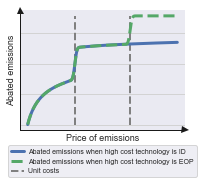

In [12]:
if catalog in ["categoryexperiment", "categoryexperiment2"]:
    #Emission figure
    fig = plt.figure(figsize=(2.95, 2.2))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    col = "M0-M"
    ls = {"ID":"-", "EOP":"--"}
    for i, module in enumerate(["ID", "EOP"]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore") #Otherwise throws warning if the column is named "M"
            #ax.plot(df.index, col, color=colors[0], data=df, label=translate(col), linewidth=4)
            ax.plot(df[module].index, df[module]["M0-M"], color=colors[i], label=translate(col) + " when high cost technology is " + module, linewidth=3, ls=ls[module])

    ax.vlines(x=vlines, ymin=df["EOP"][col].min(), ymax=df["EOP"][col].max(), ls='--', color="grey", lw=2, label="Unit costs")
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, fontsize=7, loc="upper center", bbox_to_anchor=(0.5, -0.1), frameon=True, handletextpad=0.6, handlelength=1.9, columnspacing=1)

    format_single_axis(ax, x_label=translate(df["ID"].index.name), y_label=translate(col))
    ax.set_autoscale_on(False)
    ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=7)
    ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=7)
    fig.savefig("AbatedEmissions_" + catalog + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
    del fig, ax

In [13]:
if (not elec) and (not smoothed):
    if catalog in ["main_catalog", "categoryexperiment_ID", "categoryexperiment_EOP"]:
        col = "PwThat_basetech_EH_oil"
        slope = df[col].iloc[0:2].reset_index().diff().iloc[1, 1] / df[col].iloc[0:2].reset_index().diff().iloc[1, 0]
        df[col + "_linear"] = pd.Series(((pd.Series(df[col].index) - df.index[0]) * (df[col].iloc[0:2].reset_index().diff().iloc[1, 1] / df[col].iloc[0:2].reset_index().diff().iloc[1, 0]) + df[col].iloc[0]).values, index=df.index)
        #Figure with oil price and oil usage
        fig = plt.figure(figsize=(2.95, 2.2))
        fig.add_subplot(1, 1, 1)
        ax = fig.get_axes()[0]
        col = "PwThat_basetech_EH_oil"
        assert col in df.columns
        df[col + "_linear"] = pd.Series(((pd.Series(df[col].index) - df.index[0]) * (df[col].iloc[0:2].reset_index().diff().iloc[1, 1] / df[col].iloc[0:2].reset_index().diff().iloc[1, 0]) + df[col].iloc[0]).values, index=df.index)
        ax.plot(df.index, col + "_linear", data=df, label=translate(col + "_linear"), linewidth=2, color="grey")
        ax.plot(df.index, col, data=df, label=translate(col), linewidth=3, color=colors[0])
        ax2 = ax.twinx()
        col = "qD_oil"
        ax2.plot(df.index, col, data=df, label=translate(col), linewidth=3, color=colors[1])
        ax2.vlines(x=vlines, ymin=df[col].min(), ymax=df[col].max(), ls='--', color="grey", lw=2, label="Unit costs of end-of-pipe technologies")
        lines, labels = ax.get_legend_handles_labels()
        lines = lines + ax2.get_legend_handles_labels()[0]
        labels = labels + ax2.get_legend_handles_labels()[1]
        ax.legend(lines, labels, fontsize=7, loc="upper center", bbox_to_anchor=(0.5, -0.1), frameon=True, handletextpad=0.6, handlelength=1.9, columnspacing=1)
        format_double_axes(ax, ax2, "Price of emissions", "Oil price, oil usage")
        ax.set_autoscale_on(False)
        ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=7)
        ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=7)
        fig.savefig("oil_" + catalog + currapp_string + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
        del fig, ax, ax2

In [14]:
if catalog in ["categoryexperiment"]:
    fig = plt.figure(figsize=(2.95, 2.2))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    col = "PwThat_basetech_EH_oil"
    ls = {"ID":"-", "EOP":"--"}
    for i, module in enumerate(["ID", "EOP"]):
        assert col in df[module].columns
        ax.plot(df[module].index, col, data=df[module], label=translate(col) + ", " + module, linewidth=3, ls=ls[module])
    ax2 = ax.twinx()
    col = "qD_oil"
    for i, module in enumerate(["ID", "EOP"]):
        ax2.plot(df[module].index, col, data=df[module], label=translate(col) + ", " + module, linewidth=3, ls=ls[module])

    ax2.vlines(x=vlines, ymin=df["ID"][col].min(), ymax=df["ID"][col].max(), ls='--', color="grey", lw=2, label="Unit cost")
    lines, labels = ax.get_legend_handles_labels()
    lines = lines + ax2.get_legend_handles_labels()[0]
    labels = labels + ax2.get_legend_handles_labels()[1]
    lines[0]._sizes = [30]
    ax.legend(lines, labels, fontsize=7, loc="upper center", bbox_to_anchor=(0.5, -0.1), frameon=True, ncol=2, handletextpad=0.6, handlelength=1.9, columnspacing=1)
#     ax.legend().legendHandles[0]._sizes = [1]
#     ax.legend().legendHandles[1]._sizes = [1]
    format_double_axes(ax, ax2, "Price of emissions", "Oil price, oil usage")
    ax.set_autoscale_on(False)
    ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=7)
    ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=7)
    fig.savefig("oil_" + catalog + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
    del fig, ax, ax2

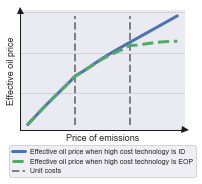

In [16]:
if catalog in ["categoryexperiment2"]:
    fig = plt.figure(figsize=(2.95, 2.2))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    col = "PwThat_basetech_EH_oil"
    ls = {"ID":"-", "EOP":"--"}
    for i, module in enumerate(["ID", "EOP"]):
        assert col in df[module].columns
        ax.plot(df[module].index, col, data=df[module], color=colors[i], label=translate(col) + " when high cost technology is " + module, linewidth=3, ls=ls[module])
    #ax2 = ax.twinx()
    #col = "qD_oil"
    #for i, module in enumerate(["ID", "EOP"]):
    #    ax2.plot(df[module].index, col, data=df[module], label=translate(col) + ", " + module, linewidth=3, ls=ls[module])

    ax.vlines(x=vlines, ymin=df["ID"][col].min(), ymax=df["ID"][col].max(), ls='--', color="grey", lw=2, label="Unit costs")
    lines, labels = ax.get_legend_handles_labels()
    #lines = lines + ax2.get_legend_handles_labels()[0]
    #labels = labels + ax2.get_legend_handles_labels()[1]
    #lines[0]._sizes = [30]
    ax.legend(lines, labels, fontsize=7, loc="upper center", bbox_to_anchor=(0.5, -0.1), frameon=True, ncol=1, handletextpad=0.6, handlelength=1.9, columnspacing=1)
#     ax.legend().legendHandles[0]._sizes = [1]
#     ax.legend().legendHandles[1]._sizes = [1]
    #format_double_axes(ax, ax2, "Price of emissions", "Effective oil price")
    format_single_axis(ax, "Price of emissions", "Effective oil price")
    ax.set_autoscale_on(False)
    ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=7)
    ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=7)
    fig.savefig("effoilprice_" + catalog + ".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
    #del fig, ax, ax2
    del fig, ax


Figure showing quantities in the MNL nest where the technology and the baseline compete

In [16]:
if (catalog == "main_catalog") and (not elec):
    fig = plt.figure(figsize=(2.95, 2.2))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    if not smoothed:
        for i, col in enumerate(["qD_U0_ID_C_EH_2", "qD_U_ID_t1_2", "qD_U_ID_t2_1"]):
            ax.plot(df.index, col, data=df, label=translate(col), linewidth=3)
    else:
        for i, col in enumerate(["qD_U_ID_t1_2"]):
            ax.plot(df[catalog].index, col, data=df[catalog], label=translate(col) + " with low heterogeneity", linewidth=3)
            ax.plot(df[catalog + smoothed_string].index, col, data=df[catalog + smoothed_string], label=translate(col) + " with higher heterogeneity", linewidth=3)
    if not elec:
        #if not smoothed:
        ax.vlines(x=vlines, ymin=0, ymax=ax.get_ylim()[1]*0.95, ls='--', color="grey", lw=2, label="Unit costs of end-of-pipe technologies")
    lines, labels = ax.get_legend_handles_labels()
    # lines = lines + ax2.get_legend_handles_labels()[0]
    # labels = labels + ax2.get_legend_handles_labels()[1]
    ax.legend(lines, labels, fontsize=7, loc="upper center", bbox_to_anchor=(0.5, -0.1), frameon=True, ncol=1, handletextpad=1, handlelength=1.9, columnspacing=1)
    format_single_axis(ax, "Price of emissions", "Market shares")
    ax.set_autoscale_on(False)
    ax.plot(ax.get_xlim()[0], ax.get_ylim()[1], "^k", clip_on=False, lw=2, markersize=7)
    ax.plot(ax.get_xlim()[1], ax.get_ylim()[0], ">k", clip_on=False, lw=2, markersize=7)
    fig.savefig("U_overlap_" + catalog + currapp_string + smoothed_string +".pdf", bbox_inches="tight", transparent=True, facecolor="none", edgecolor='none')
    del fig, ax

In [17]:
if explore:
    if catalog == "main_catalog":
        fig = plt.figure(figsize=(12, 8))
        fig.add_subplot(1, 1, 1)
        ax = fig.get_axes()[0]
        for i, col in enumerate(["PwThat_U_ID_t1_2", "PwThat_U0_ID_C_EH_2", "PwThat_U_ID_t2_1", "PwThat_C_EH_2"]):
            assert col in df.columns
            ax.plot(df.index, col, data=df, label=translate(col), linewidth=4, color=colors[i])
        lines, labels = ax.get_legend_handles_labels()
        ax.legend(lines, labels, fontsize=16, loc="center left")
        del fig, ax

In [ ]:
if explore:
    if catalog == "main_catalog":
        fig = plt.figure(figsize=(12, 8))
        fig.add_subplot(1, 1, 1)
        ax = fig.get_axes()[0]
        for i, col in enumerate(["PwThat_U_ID_t2_1", "PwThat_U0_ID_C_EH_3", "PwThat_U_ID_t2_2", "PwThat_ID_t2"]):
            assert col in df.columns
            ax.plot(df.index, col, data=df, label=translate(col), linewidth=4, color=colors[i])
        lines, labels = ax.get_legend_handles_labels()
        ax.legend(lines, labels, fontsize=16, loc="center left")
        del fig, ax

In [ ]:
if explore:
    if catalog == "main_catalog":
        fig = plt.figure(figsize=(12, 8))
        fig.add_subplot(1, 1, 1)
        ax = fig.get_axes()[0]
        for i, col in enumerate(["qD_U_ID_t2_1", "qD_U0_ID_C_EH_3", "qD_U_ID_t2_2", "qD_ID_t2"]):
            assert col in df.columns
            ax.plot(df.index, col, data=df, label=translate(col), linewidth=4, color=colors[i])
        lines, labels = ax.get_legend_handles_labels()
        ax.legend(lines, labels, fontsize=16, loc="center left")

In [ ]:
if catalog in ["categoryexperiment_ID", "categoryexperiment_EOP"]:
    fig = plt.figure(figsize=(12, 8))
    fig.add_subplot(1, 1, 1)
    ax = fig.get_axes()[0]
    if "ID" in catalog:
        cols = ["qD_C_EH_2", "qD_U0_ID_C_EH_2", "qD_U_ID_t1_1"]
    elif "EOP" in catalog:
        cols = "YO"
    for i, col in enumerate(cols):
        assert col in df.columns
        ax.plot(df.index, col, data=df, label=translate(col), linewidth=4, color=colors[i])
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, fontsize=16, loc="center", bbox_to_anchor=(0.5, -0.25))
    format_single_axis(ax, "Price of emissions", "Input-displacing technology")
    del fig, ax